In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('visadata')

In [2]:
df.duplicated().sum()

0

In [3]:
df.drop(['case_id','_id'], axis = 1, inplace = True)

In [4]:
from datetime import date

todays_date = date.today()
current_year = todays_date.year

In [6]:
current_year

2024

In [8]:
df['company_age'] = current_year - df['yr_of_estab']

In [9]:
df.drop('yr_of_estab', inplace = True, axis = 1)

## Numerical Features:

In [10]:
nums = [feature for feature in df.columns if df[feature].dtype != 'O']

print(f'Number of numerical features {len(nums)}')

Number of numerical features 3


## Categorical Features:

In [11]:
cats = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f'Number of categorical features {len(cats)}')

Number of categorical features 8


## Discrete Features:

In [12]:
disc = [feature for feature in nums if len(df[feature].unique()) <= 25]

print(f'Number of discrete features {len(disc)}')

Number of discrete features 0


## Continuous Features:

In [13]:
cont = nums = [feature for feature in nums if feature not in disc]

print(f'Number of continuous features {len(cont)}')

Number of continuous features 3


## Split train / test

In [14]:
X = df.drop('case_status', axis = 1)
y = df['case_status']

In [15]:
y = np.where(y=='Denied', 1, 0)
y

array([1, 0, 1, ..., 0, 0, 0])

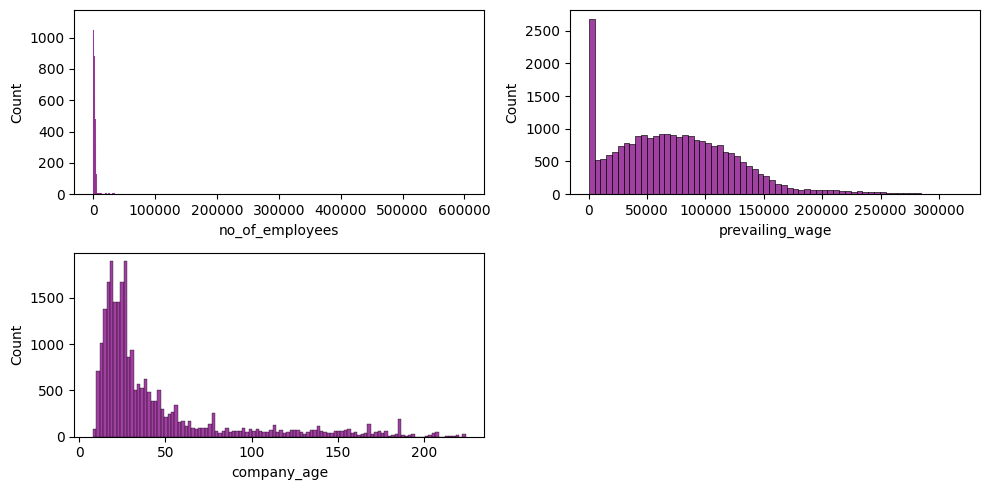

In [18]:
plt.figure(figsize = (10,5))
for i, col in enumerate(['no_of_employees','prevailing_wage','company_age']):
    plt.subplot(2,2, i + 1)
    sns.histplot(x = X[col], color = 'purple')
    plt.xlabel = (col)
    plt.tight_layout()

In [19]:
X[cont].skew(axis = 0,skipna=True)

no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

## Apply the power transform

In [22]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

trans_feat = ['company_age', 'no_of_employees']
X_copy = pt.fit_transform(X[trans_feat])

In [23]:
X_copy = pd.DataFrame(X_copy, columns = trans_feat)

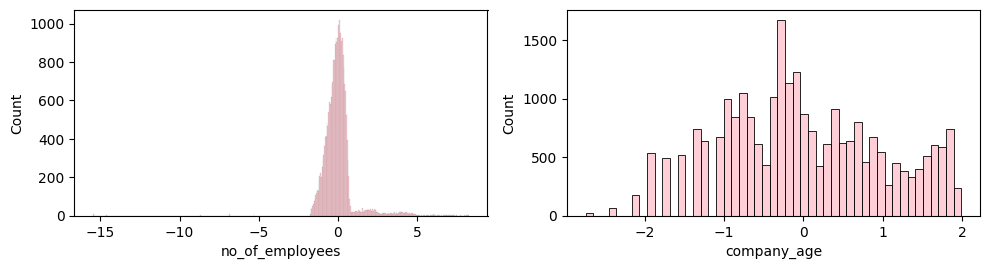

In [25]:
plt.figure(figsize = (10,5))
for i, col in enumerate(['no_of_employees','company_age']):
    plt.subplot(2,2, i + 1)
    sns.histplot(x = X_copy[col], color = 'pink')
    plt.xlabel = (col)
    plt.tight_layout()

In [27]:
X_copy.skew(axis = 0, skipna = True)

company_age        0.103264
no_of_employees    0.399339
dtype: float64